Forward Difference Scheme
===========

# Theory
The most straight forward scheme of the finite difference is the **Forward Difference Approximation (FD)**. 

## Definition
Recall that definition of derivative of function $f(x)$ at some point $x$ is
$$
\begin{equation}
    f^\prime(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}
\end{equation}$$

The **FD Approximation** is derived from the same finite difference formula above "i.e. without the limit", but we consider $h$ to be small rather than vanishing.
$$ \begin{equation}
f^\prime(x) \approx \frac{f(x+h) - f(x)}{h} \end{equation}
$$
<img src="./Resources/FD Approx.png" width="1000">

The **FD Approximation** is **Two Points Stencil** arrangement i.e. it is constructed by the current node and its forward neighboring node.

## Examples
Let $f(x) = 3\sin(x)$ find the finite difference approximation of the first derivative at $x=2$ and compare it with the analytical solution. Consider $h=0.1$

$$
\begin{align*}
\textbf{FD:}& \qquad \nabla_h^{(1)} = \frac{3\sin(2+0.1) - 3\sin(2)}{0.1} = -1.382641\dots\\[10pt]
\textbf{Analytical:}& \qquad f'(x) = 3\cos(2) = -1.248440\dots
\end{align*}
$$

# Implementation

## Imports

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [3]:
domain = [-2,2]
h = 1
func = sp.sin(x)        # use sp. methods only "i.e sp.cos()"

## Algorithm

```mermaid
    flowchart LR
        get_args(Get arguments) --> f_prime(Compute equ.1 on the specified x)
```

In [4]:
def FD(f: Callable, x: float, h: float) -> float:
    '''
    Forward finite difference approximation of the derivative for a given function `f`

    Args:
        f: Function to approximate the derivative
        x: Point to evaluate the derivative at
        h: Discretization factor or step size

    Returns:
        Derivative approximation at the given point `x`
    '''
    
    return (f(x+h) - f(x)) / h

## Results Visualization & Basic Error Analysis
This investigation aims to illustrate accuracy of the finite difference forward scheme approximation of the derivative. Common error metrics/visualization used are
- Derivative Plot: The closeness of the FD derivative approximation to the analytical
- Error Scatter: Investigation of error trends and magnitude
- $L_2$ Norm: Quantitative measure of total error
- Mean Squared Error (MSE): Quantitative measure of total error
- Maximum Absolute Error: Quantitative measure on the maximum error

In [5]:
# domain
xx = np.linspace(*domain)
xx_h = np.linspace(*domain, int((domain[1] - domain[0]) / h + 1))

# analytical derivative
func_prime = sp.diff(func)

# parse expressions to lambda
f = (lambda x : np.ones_like(x)*float(func)) if sp.simplify(func).is_constant() else sp.lambdify(x, func) 
f_prime = (lambda x : np.ones_like(x)*float(func_prime)) if sp.simplify(func_prime).is_constant() else sp.lambdify(x, func_prime)

# finite-difference approximation
f_prime_FD = [FD(f, x, h) for x in xx_h]

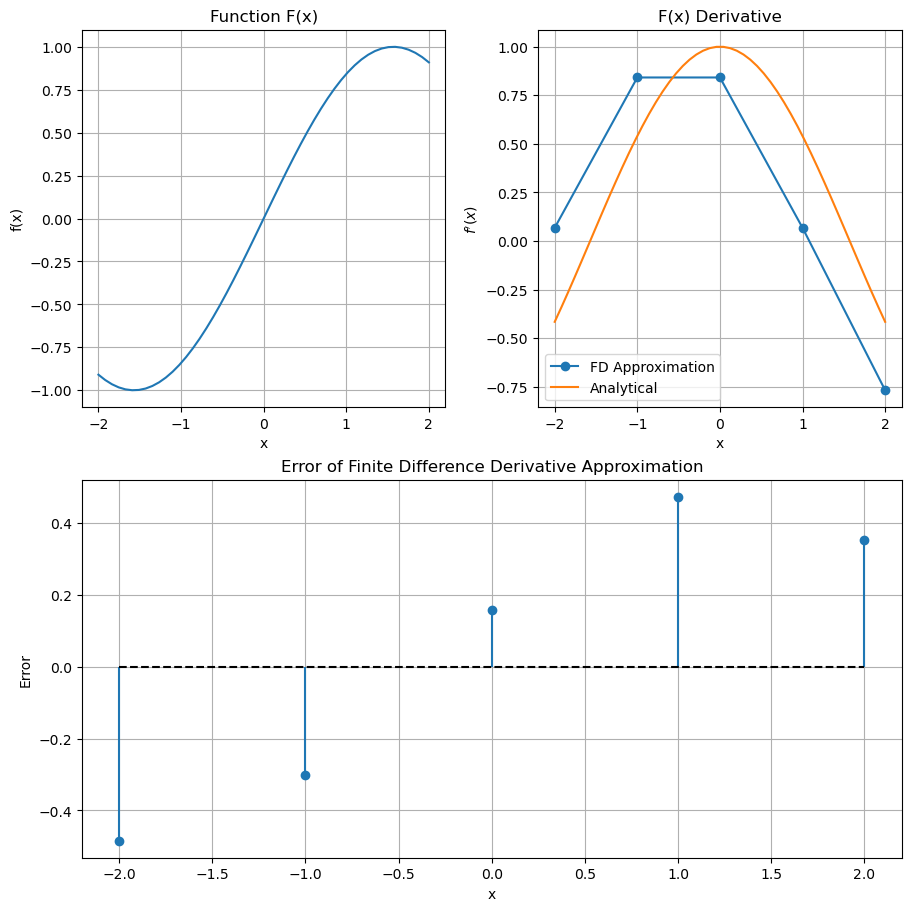

,Property,Quantity
0,l_2 error norm,0.834999
1,mean squared error,0.139445
2,maximum error,0.483973


In [6]:
fig, ax = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'lower left']],
                              figsize=(9,9), layout="constrained")

# f(x) plot
ax['upper left'].plot(xx, f(xx))
ax['upper left'].set(xlabel="x", ylabel="f(x)", title="Function F(x)")
ax['upper left'].grid(True)

# derivative of f(x) plot
ax['right'].plot(xx_h, f_prime_FD, marker="o", label="FD Approximation")
ax['right'].plot(xx, f_prime(xx), label="Analytical")
ax['right'].set(xlabel="x", ylabel=r"$f'(x)$", title="F(x) Derivative")
ax['right'].legend()
ax['right'].grid(True)

# error
error = f_prime(xx_h) - f_prime_FD
ax['lower left'].stem(xx_h, error, basefmt="k--")
ax['lower left'].set(xlabel="x", ylabel="Error", title="Error of Finite Difference Derivative Approximation")
ax['lower left'].grid(True)


# summary
summary = [
    ("l_2 error norm", np.linalg.norm((error))),
    ("mean squared error", np.mean(abs(error)**2)),
    ("maximum error", np.max(abs(error)))
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Quantity"])

plt.show()
df

One can see from the plots above that the **forward difference approximation** tend to **overestimate** the actual derivative in the region where the derivative is going in increasing trend and **underestimate** the actual derivative when the derivative is going in decreasing trend.

## Approximation Error
In this section we will investigate the approximation error of the scheme. This error will tell us 
- Analytically: This through the definition finite difference that's derived from taylor expansion
- Experimentally: Convergence plot where we trace the error as $h$ changes

### Analytically
The taylor expansion of $f(x+h)$, *$f(x)$ around a shifted location $x = x + h$ (where $h \gt 0$)*; about some variable point $x = x$ is
$$\begin{equation*}
f(x + h) = f(x) + \frac{h}{1!}f^\prime(x) + \frac{h^2}{2!}f^{\prime\prime}(x) + \dots + \frac{h^n}{n!}f^{(n)}(x) \end{equation*} \\
$$

Rearranging the terms and multiply both side by $1/h$, one can see that the forward difference approximation *"one the left hand side"*, with the truncation error presented in the terms right to $f^\prime(x)$ that we did not include in our approximation "i.e. we truncate the series before these terms"
$$
\begin{equation*}
\Longrightarrow \frac{f(x + h) - f(x)}{h} = f^\prime(x) \;\; \underbrace{+ \frac{h}{2!}f^{\prime\prime}(x) + \dots + \frac{h^n}{n!}f^{(n)}(x)}_{O(h)}
\end{equation*}
$$
We can see from the right hand side that forward difference is an approximation with error of order $O(h)$ "i.e. first-order accurate". This means that as $h$ get smaller the error will reduce along a first order trend line.

> **Truncation Error** results from the truncating/excluding terms from infante series

### Experimentally
This achieved by tracing the error of the approximation for different ranges of $h$ and then plot them against each other. To study the asymptotic change we also plot the relation in log plo
>**Note:** Why log plot? we want to overlook any variation of the error plot that might appear in the normal scale, since this will allow us to better spot its overall trend "i.e. $O(h), \; O(h^2) \;\dots$"

In [29]:
H = np.geomspace(1e-4, 1, num=20) 

errors=[]
for h_i in H:
    error = f_prime(2) - FD(f, 2, h_i)
    errors.append(abs(error))

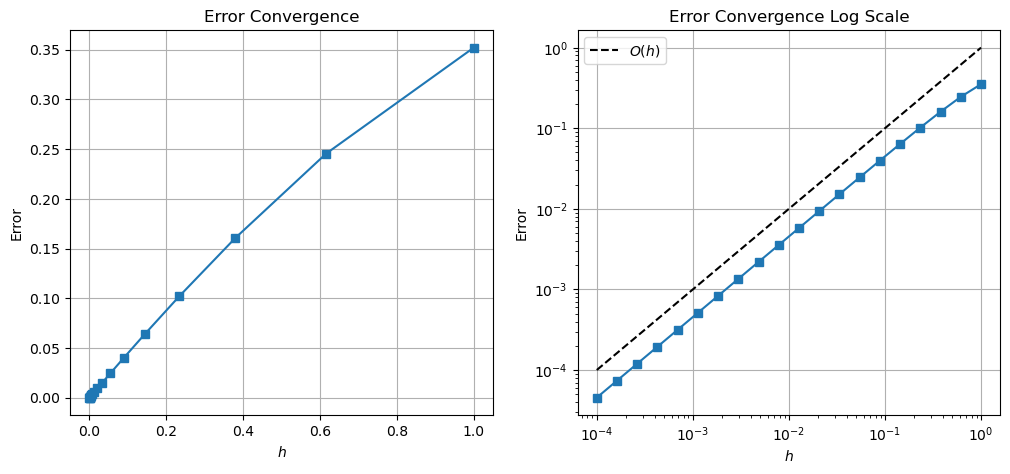

In [31]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# convergence
ax[0].plot(H, errors, marker="s")
ax[0].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence")
ax[0].grid(True)

# convergence log scale
ax[1].plot(H, H, "k--", label=r"$O(h)$")                 # trend line O(h)
ax[1].plot(H, errors, marker="s")
ax[1].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence Log Scale", xscale="log", yscale="log")
ax[1].grid(True)
ax[1].legend()

plt.show()

## Accuracy vs ill-Conditioning
In this section we will investigate the conditioning of the scheme formula, and how it affect it accuracy. A mathematical formula is considered to be ill-conditioned if it amplify perturbations, and conditioned if it do the contrary. A major perturbation encountered in computational processes is round-off errors, due to floating point representation. In this section we would like to see how finite difference formula behave under such perturbations. The investigation is carried out in two directions.
- Analytically: Starting from example to illustrate the affect round-off errors in the finite difference formula. Then discuss how to mitigate such effect.
- Experimentally: Trace the error as $h$ get too small.

### Analytically
Let consider the following example of computing the forth order derivative of some function $f(x)$ using symmetric finite difference scheme. Given that $f^{(4)}(x) \approx 1$, if computed with infinite precision; and $f(x) \approx 1$. So, for $h = 10^{−3}$ the fourth order derivative approximation using symmetric finite difference scheme reads
$$
\begin{equation*}
    f^{(4)}(x) \approx \frac{10^{12}}{16} \;[\; f(x+4h) + 6f(x) + f(x-4h) - (\; 4f(x+2h) + 4f(x-2h) \;) \;]
\end{equation*}$$

Let now introduce perturbation presented in rounding error. We do so by making $h$ small enough such that following terms become **almost equal** "in the floating-point representation"
$$
\begin{equation*}
    f(x\pm ch) \approx f(x)
\end{equation*}$$

This will make the scheme  evaluate as 
$$
\begin{equation*}
    f^{(4)}(x) \approx \frac{10^{12}}{16} \;[\; \underbrace{f(x+4h) + 6f(x) + f(x-4h)}_{\approx 8f(x)} \textcolor{red}{-} \underbrace{(\; 4f(x+2h) + 4f(x-2h) \;)}_{\approx 8f(x)} \;]
\end{equation*}$$

The analytical result $f^{(4)} (x) \approx 1$ can be achieved only if the expression contained in the square brackets is order $O(10^{−12})$. However one can see due to rounding error the expression inside square brackets suffer from numerical extinction and evaluated to zero.

> **Numerical Extinction:** cancellation to zero when subtracting two almost equal numbers. This happen due to the use of finite precision in floating-point arithmetics, which lead to losing all digits down to machine epsilon when doing the subtraction "i.e. treat both numbers as identical which lead to zero"


We can say that, the finite difference formulas are in general ill-conditioned due to their mathematical definition that is prone to numerical extinction, in floating-point arithmetic; as $h$ gets small.

In [75]:
H = np.geomspace(1e-19, 1, num=30) 

errors=[]
for h_i in H:
    error = f_prime(2) - FD(f, 2, h_i)
    errors.append(abs(error))

# optimal h
i = np.where(errors == np.min(errors))[0][0]
h_optimal = H[i]

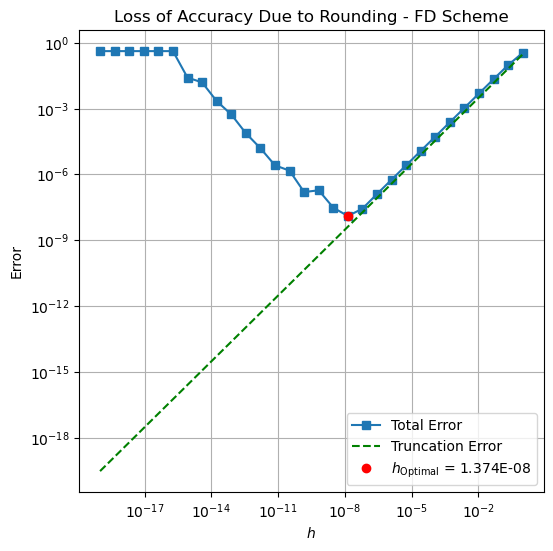

In [94]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# plot
ax.plot(H, errors, marker="s", label="Total Error")
ax.plot(H, 0.3*H, "g--", label="Truncation Error")
ax.plot(H[i], errors[i], "ro", label=r"$h_{\mathrm{Optimal}}$ = "+f"{h_optimal:.3E}")
ax.set(xlabel=r"$h$", ylabel="Error", title="Loss of Accuracy Due to Rounding - FD Scheme", xscale="log", yscale="log")
ax.grid(True)
ax.legend()

plt.show()